
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>


## Práctica 1. Transformaciones Geométricas(Parte II)


### Objetivos
En esta lección aprenderemos a realizar transformaciones geométricas con una imagen. Son de gran utilidad en diferentes contextos. En este sentido aprenderemos a:
* Escalar 
* Trasladar
* Rotar
* Transformaciones afines
* Transformaciones proyectivas
* Recortar 

### Escalado
El escalado de una imagen nos va a permitir cambiar su tamaño. Para ello usaremos la funcion **cv2.resize()**

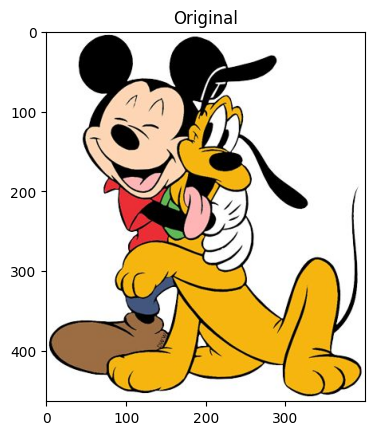

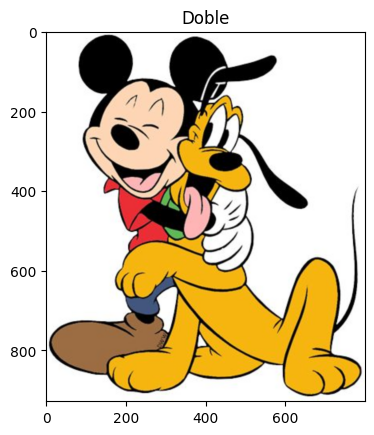

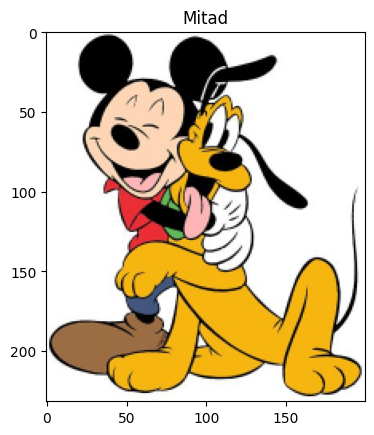

In [2]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('miki_pluto.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Doblamos el tamaño de la imagen
resized_img = cv2.resize(img, (img.shape[1]*2,img.shape[0]*2), interpolation=cv2.INTER_LINEAR)
#Tambien podemos reducirla a la mitad o al cualquier otro factor indicando
#los parámetros de escalado
dst_img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

plt.imshow(img)
plt.title("Original")
plt.show()
plt.imshow(resized_img)
plt.title("Doble")
plt.show()
plt.imshow(dst_img)
plt.title("Mitad")
plt.show()

Si quieres agrandar la imagen, el mejor método de interpolación es 
cv2.INTER_CUBIC  o cv2.INTER_LINEAR.


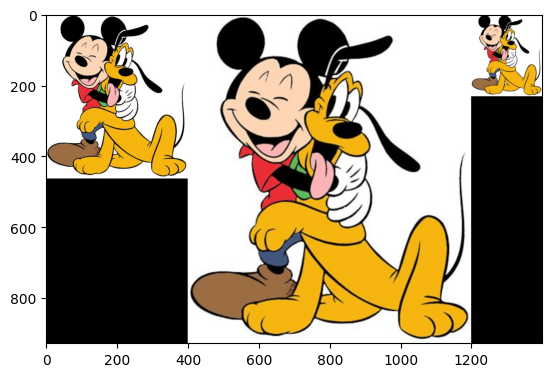

In [20]:
import numpy as np
test = np.zeros((max(img.shape[0],resized_img.shape[0],dst_img.shape[0]),img.shape[1] + resized_img.shape[1] + dst_img.shape[1],  3), dtype=np.uint8)
test[:img.shape[0], :img.shape[1]] = img
test[:resized_img.shape[0], img.shape[1]:img.shape[1] + resized_img.shape[1]] = resized_img
test[:dst_img.shape[0], img.shape[1] + resized_img.shape[1]: img.shape[1] + resized_img.shape[1] + dst_img.shape[1]] = dst_img
plt.imshow(test)

## Trasladar una imagen
Para trasladar un objeto, se necesita crear un matriz de traslación $2\times 3$, como se muestra a continuación.


In [33]:
import numpy as np
x=100
y=80
M = np.float32([[1, 0, x], [0, 1, y]])
print(M)

[[  1.   0. 100.]
 [  0.   1.  80.]]


Una vez que la matriz ha sido creada, se invoca a la función cv2.warpAffine() para aplicar  la transformación sobre una imagen, en este caso es una transformación afine. Transformaciones afines son aquellas que las lineas paralelas las mantiene paralelas trás la transformación.


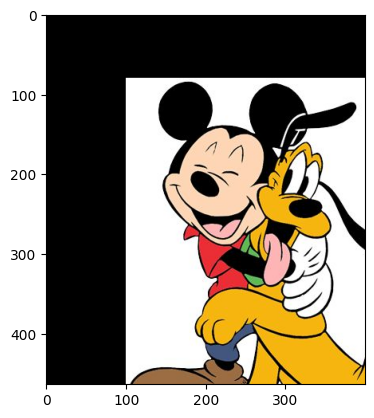

In [34]:
import cv2
width=img.shape[1]
height=img.shape[0]
dst_img = cv2.warpAffine(img, M, (width, height))
plt.imshow(dst_img)

La rotación de un imagen por un ángulo $\theta$ se obtiene mediante la
matriz de rotación:
    <img src="m_rot.png" >
Además OpenCV permite crear matrices de rotación con parámetros de escalado y ajustable a cualquier centro de rotación. 
    

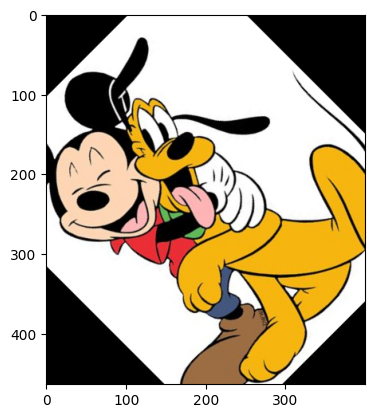

In [35]:
rows,cols=img.shape[:2]
#parametros: centro, angulo y escalado
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
#M = cv2.getRotationMatrix2D((0,0),45,1)
dst_img = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst_img)

### Transformaciones afines
Como se comento antes una transformación afine mantiene las lineas paralelas. Para encontrar la transformación, necesitamos tres puntos desde la imagen de entrada y su correspondientes puntos en la imagen de salida. En este caso la función cv2.getAffineTransform crea una matriz $2\times 3$ que se pasa a la función cv2.warpAffine.

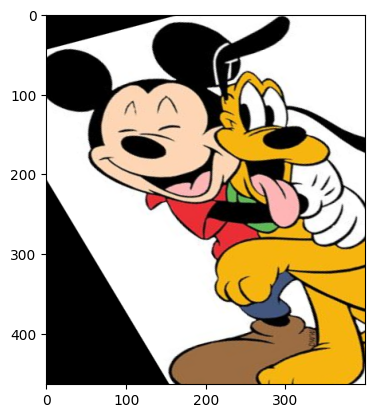

In [36]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst_img = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst_img)


### Transformaciones en Perspectiva
Para realizar una transformación en perspectiva necesitas una matrix $3\times 3$. Las lineas rectas las mantiene rectas. Para encontrar esta transformación, se necesita 4 puntos de la imagen de entrada y los correspondientes en la imagen de salida. Entre esos cuatro puntos, 3 de ellos deben ser colineales. Para construir la matriz de transformación que usa la función cv2.getPerspectiveTransform y a continuación para aplicarla se usa cv2.warpPerspective con la matrix de trnasformación.

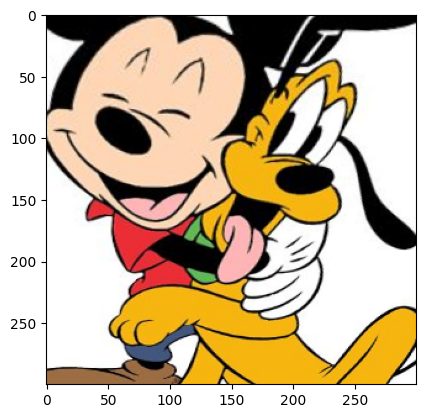

In [21]:
pts1 = np.float32([[56,65],[268,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst_img = cv2.warpPerspective(img,M,(300,300))
plt.imshow(dst_img)

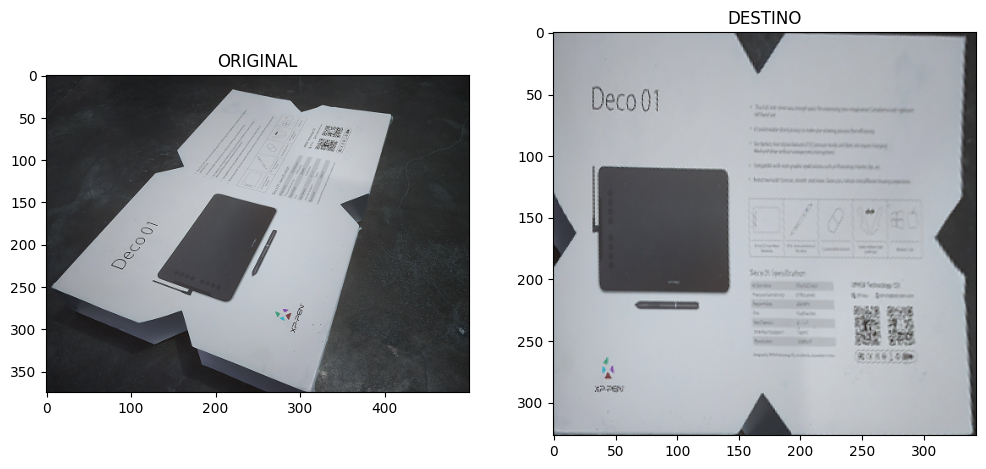

In [22]:
#Un ejemplo mas complejo
import cv2
import numpy as np
img = cv2.imread('deco1.png')
# Los puntos de forma [cols, rows]. Representan las esquinas del objeto
pt_A = [13, 248]
pt_B = [314, 376]
pt_C = [408, 46]
pt_D = [221, 14]

width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
maxWidth = max(int(width_AD), int(width_BC))

height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))

input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])
# Calculamos la transformada en perspectiva M
M = cv2.getPerspectiveTransform(input_pts,output_pts)
#Aplicamos la transformación
out = cv2.warpPerspective(img,M,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR)
#Mostramos
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("ORIGINAL")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("DESTINO")
plt.imshow(out)

En general los pasos para aplicar una transformación en perspectiva son:
* Selecciona 4 puntos en la imagen de entrada (importante en el sentido contrario a las agujas del reloj, empezando arriba a la izquierda)
* Especificar las correspondientes coordenadas de salida
* Calcular la transformada de perspectiva 
* Aplicar la transformada de perspectiva a la imagen de entrada


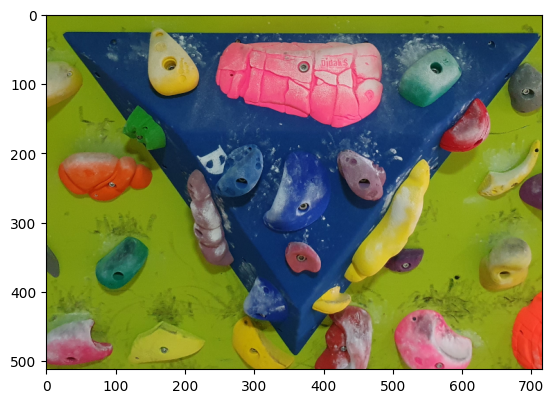

In [40]:
import cv2
import numpy as np

# To open matplotlib in interactive mode
# %matplotlib qt
img = cv2.imread('roco.png')
 
# Create a copy of the image
img_copy = np.copy(img)
 
# Convert to RGB so as to display via matplotlib
# Using Matplotlib we can easily find the coordinates
# of the 4 points that is essential for finding the 
# transformation matrix
img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
 
plt.imshow(img_copy)

El anterior código te abre una ventana interactiva en la que puedes ver los puntos que te interesa

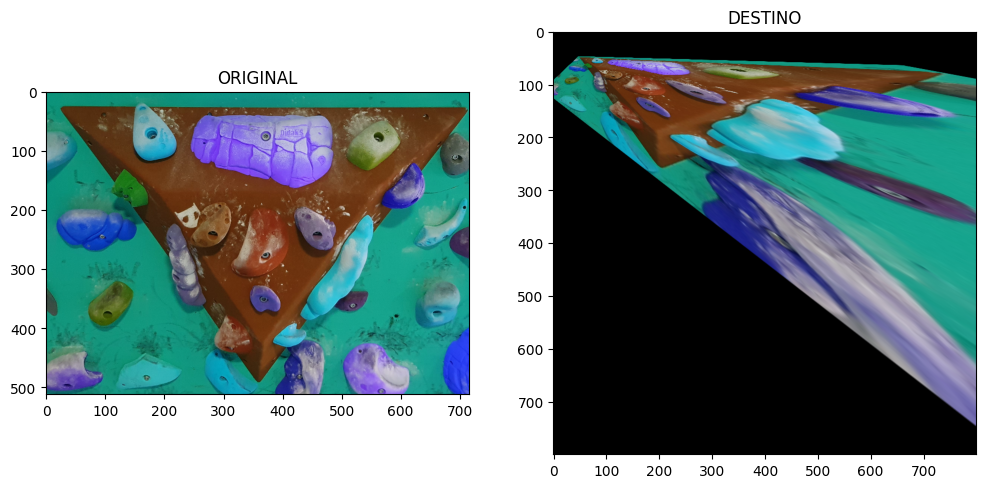

In [41]:
input_pts = np.float32([[28,36],[360,487],[371,423],[701,22]])
output_pts = np.float32([[50,50],[200,250],[200,190],[650,72]])
M = cv2.getPerspectiveTransform(input_pts,output_pts)
#Aplicamos la transformación
out = cv2.warpPerspective(img,M,(800,800),flags=cv2.INTER_LINEAR)
#Mostramos
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("ORIGINAL")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("DESTINO")
plt.imshow(out)
 

### Recortar una imagen
Esto lo podemos usar indicando las posiciones que queremos coger de la imagen de la siguiente forma


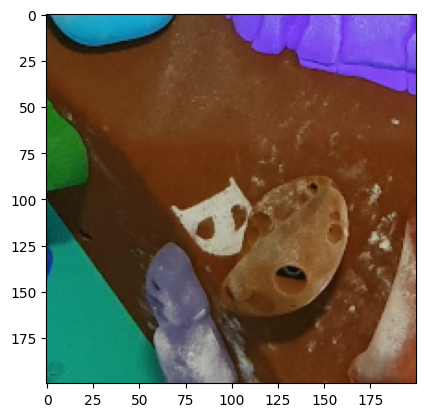

In [42]:
dst=img[100:300,150:350]
plt.imshow(dst)

### Ejercicio.- Cambiando la decoración




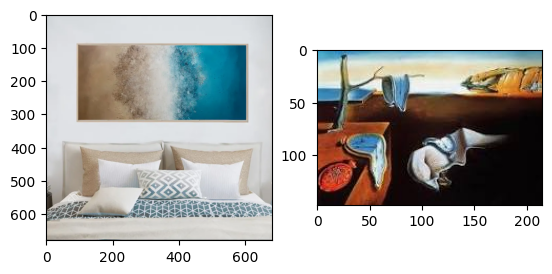

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib qt
hab = cv2.imread('habi1.png')
hab = cv2.cvtColor(hab,cv2.COLOR_BGR2RGB)

cuadro = cv2.imread('dali.jpg')
cuadro = cv2.cvtColor(cuadro,cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(hab)
plt.subplot(1,2,2)
plt.imshow(cuadro)
plt.show()

(680, 680, 3)


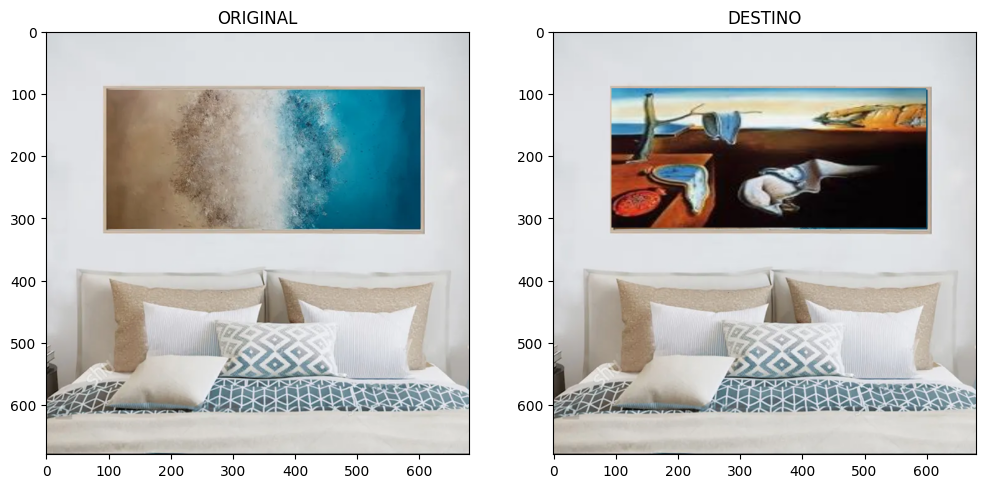

In [25]:
#Puntos del cuadro de Dali donde se tienen que convertir en la habitación
inputs_pts = np.float32([[0,0],[0,147],[213,147],[213,0]])
outputs_pts = np.float32([[94,92],[94,316],[599,316],[599,92]])
start_point=(94,92)
end_point= (599,315)

color=(255,255,255)
print(hab.shape)
rec = np.zeros((hab.shape[0],hab.shape[1]),dtype=np.uint8)

rec= cv2.rectangle(rec, start_point, end_point, color, -1) 

# Calculamos la transformada en perspectiva M
M = cv2.getPerspectiveTransform(inputs_pts,outputs_pts)
cuadro_mod = cv2.warpPerspective(cuadro,M,(hab.shape[0],hab.shape[1]),flags=cv2.INTER_LINEAR)

#Ahora creamos el pegado
#obtenemos una mascara con 3 bandas
mask = cv2.merge([rec,rec,rec],3)/255

salida = (mask * cuadro_mod+ (1-mask)*hab).astype(np.uint8)
#Mostramos
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("ORIGINAL")
plt.imshow(hab)
plt.subplot(1,2,2)
plt.title("DESTINO")
plt.imshow(salida)
 
